<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow as tf

### Load Data (3 Marks)

In [47]:
file_path="/content/drive/MyDrive/Colab Notebooks/SequentialNLP/"

In [48]:
file_name="Sarcasm_Headlines_Dataset.json"
headlines = pd.read_json(file_path+file_name,lines=True)
headlines.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [49]:
headlines.shape

(28619, 3)

In [50]:
headlines.describe(include='object')

,headline,article_link
count,28619,28619
unique,28503,28617
top,"'no way to prevent this,' says only nation whe...",https://politics.theonion.com/nation-not-sure-...
freq,12,2


### Drop `article_link` from dataset (3 Marks)

In [51]:
headlines.drop(['article_link'],axis=1,inplace=True)

### Get length of each headline and add a column for that (3 Marks)

In [52]:
headlines['len'] = headlines['headline'].str.len()

In [53]:
headlines.head()

,is_sarcastic,headline,len
0,1,thirtysomething scientists unveil doomsday clo...,61
1,0,dem rep. totally nails why congress is falling...,79
2,0,eat your veggies: 9 deliciously different recipes,49
3,1,inclement weather prevents liar from getting t...,52
4,1,mother comes pretty close to using word 'strea...,61


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [54]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (4 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=max_features,oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

tokenizer.fit_on_texts(list(headlines['headline']))


In [56]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [57]:
X=tokenizer.texts_to_sequences(headlines['headline'])

In [58]:
print('No of samples',len(X))
print(X[100])

No of samples 28619
[40, 2002, 3, 13, 7495, 208, 19, 3173, 15, 2802, 2651, 6, 189, 489]


In [59]:
headlines.iloc[100]

is_sarcastic                                                    1
headline        report: 70% of trump endorsements made after s...
len                                                            83
Name: 100, dtype: object

### Pad sequences (4 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [60]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X=pad_sequences(X,maxlen=maxlen,padding='post')
X.shape

(28619, 25)

### Vocab mapping
- There is no word for 0th index

In [61]:
tokenizer.word_index

{'<unk>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'at': 15,
 'from': 16,
 'about': 17,
 'by': 18,
 'after': 19,
 'you': 20,
 'this': 21,
 'out': 22,
 'up': 23,
 'be': 24,
 'as': 25,
 'that': 26,
 'it': 27,
 'how': 28,
 'not': 29,
 'he': 30,
 'his': 31,
 'are': 32,
 'your': 33,
 'just': 34,
 'what': 35,
 'all': 36,
 'who': 37,
 'has': 38,
 'will': 39,
 'report': 40,
 'into': 41,
 'more': 42,
 'one': 43,
 'have': 44,
 'year': 45,
 'over': 46,
 'why': 47,
 'day': 48,
 'u': 49,
 'area': 50,
 'woman': 51,
 'can': 52,
 's': 53,
 'says': 54,
 'donald': 55,
 'time': 56,
 'first': 57,
 'like': 58,
 'no': 59,
 'her': 60,
 'get': 61,
 'off': 62,
 'old': 63,
 "trump's": 64,
 'life': 65,
 'now': 66,
 'people': 67,
 "'": 68,
 'an': 69,
 'house': 70,
 'still': 71,
 'obama': 72,
 'white': 73,
 'back': 74,
 'make': 75,
 'was': 76,
 'than': 77,
 'women': 78,
 'if': 79,
 'down': 80,
 'when': 81,
 '

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [62]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

30888


In [63]:
y = np.asarray(headlines['is_sarcastic'])

### Load Glove Word Embeddings 


In [65]:
glove_file=file_path+"glove.6B.200d.txt"

### Create embedding matrix

In [66]:
embeddings = {}
for o in open(glove_file):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [67]:
embedding_matrix.shape

(30888, 200)

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [75]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(22895, 25) (22895,)
(5724, 25) (5724,)


### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, Embedding, Dropout, Bidirectional, SpatialDropout1D

In [71]:
model = Sequential()
model.add(Embedding(num_words,embedding_size,weights=[embedding_matrix],input_length=maxlen, trainable=False ) )
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(units=196, recurrent_dropout = 0.3, dropout = 0.3, return_sequences = True)))

model.add(Flatten())

#model.add(Dense(512,activation='relu'))
#model.add(Dense(256,activation='relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

### Compile the model (4 Marks)

In [72]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 25, 200)           6177600   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 25, 200)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 25, 392)           622496    
_________________________________________________________________
flatten_2 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9801      
Total params: 6,809,897
Trainable params: 632,297
Non-trainable params: 6,177,600
_________________________________________________________________


### Fit the model (4 Marks)

In [76]:
history=model.fit(x_train,y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.1 )

Epoch 1/10
322/322 [==============================] - 64s 186ms/step - loss: 0.5595 - accuracy: 0.7079 - val_loss: 0.4228 - val_accuracy: 0.8087
Epoch 2/10
322/322 [==============================] - 60s 185ms/step - loss: 0.4569 - accuracy: 0.7801 - val_loss: 0.3709 - val_accuracy: 0.8271
Epoch 3/10
322/322 [==============================] - 60s 186ms/step - loss: 0.3983 - accuracy: 0.8151 - val_loss: 0.3403 - val_accuracy: 0.8467
Epoch 4/10
322/322 [==============================] - 60s 185ms/step - loss: 0.3596 - accuracy: 0.8353 - val_loss: 0.3299 - val_accuracy: 0.8555
Epoch 5/10
322/322 [==============================] - 60s 187ms/step - loss: 0.3359 - accuracy: 0.8519 - val_loss: 0.3206 - val_accuracy: 0.8541
Epoch 6/10
322/322 [==============================] - 60s 185ms/step - loss: 0.3099 - accuracy: 0.8629 - val_loss: 0.3242 - val_accuracy: 0.8524
Epoch 7/10
322/322 [==============================] - 58s 181ms/step - loss: 0.2956 - accuracy: 0.8693 - val_loss: 0.3209 - val_ac

In [77]:
predictions = model.predict(x_test)
#predictions
#predictions = [np.argmax(x) for x in predictions]
result = np.argmax(predictions, axis = 1)
result


array([0, 0, 0, ..., 0, 0, 0])

In [78]:
y_test

array([0, 1, 1, ..., 0, 0, 1])

In [79]:
predictions

array([[0.66458243],
       [0.9914425 ],
       [0.9999999 ],
       ...,
       [0.00255903],
       [0.14565864],
       [0.9796491 ]], dtype=float32)

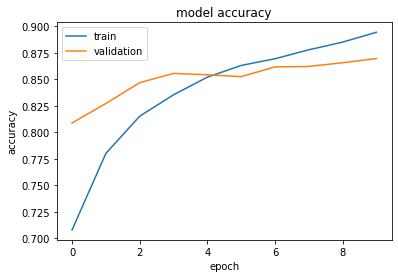

In [80]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [82]:
loss, accuracy = model.evaluate(x_test, y_test)

179/179 [==============================] - 3s 14ms/step - loss: 0.3085 - accuracy: 0.8718


In [84]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(y_test, model.predict_classes(x_test)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2995
           1       0.86      0.87      0.87      2729

    accuracy                           0.87      5724
   macro avg       0.87      0.87      0.87      5724
weighted avg       0.87      0.87      0.87      5724



In [83]:
print(confusion_matrix(y_test,model.predict_classes(x_test)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[2615  380]
 [ 354 2375]]


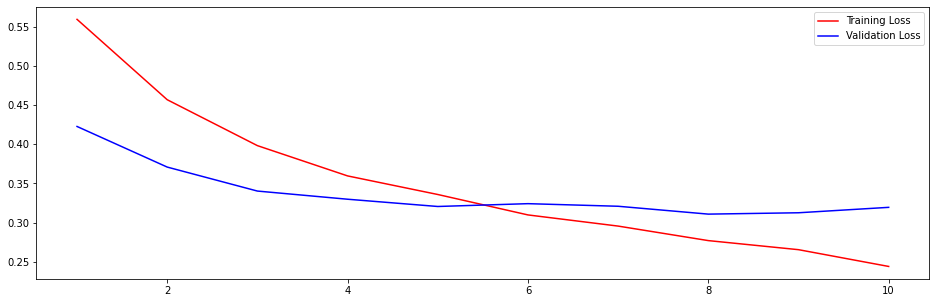

In [85]:
plt.figure(figsize=(16,5))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()